### 2. Preprocessing

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('satisfaction_2015.xlsx')

In [3]:
df.head(5)

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,117135,satisfied,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,...,3,3,1,5,3,3,4,3,0,0.0
1,72091,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,2486,0,2,...,3,2,1,1,4,4,3,2,0,0.0
2,29663,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,1448,0,3,...,3,3,3,5,3,2,3,3,0,0.0
3,81849,satisfied,Female,disloyal Customer,36,Personal Travel,Eco,1501,0,4,...,4,4,5,4,5,5,5,4,0,0.0
4,83693,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,577,0,5,...,3,3,3,4,5,3,4,3,0,0.0


In [4]:
# dropping id column
df.drop('id', axis=1, inplace=True)

In [5]:
# renaming column satisfaction_v2 and satisfaction
df.rename(columns = {'satisfaction_v2':'satisfaction'}, inplace = True)

In [6]:
# changing customer type to returning and first_time_user
df['Customer Type'].replace({'disloyal Customer':'First time user' , 'Loyal Customer': 'Returning'},inplace = True)

In [7]:
# changing Eco Plus to Eco since, people travelling in Eco Plus are very low
df['Class'].replace({'Eco Plus':'Eco'},inplace = True)

In [8]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

### 2.1 Missing Value Handling

In [9]:
# checking for missing values
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

#### Arrival delay in minutes has 393 missing values 
#### Since arrival delay in minutes and departure delay in minutes has high linear correlation, missing values in arrival delay can be filled with its corresponding values from departure delay in minutes.

In [10]:
df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].fillna(value=df["Departure Delay in Minutes"])

In [11]:
df.isna().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

#### We know that the survey results have zero values in many of them so we need to handle them

In [12]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [13]:
df['Inflight wifi service'].value_counts()

2    32320
3    32185
4    24775
1    22328
5    14356
0     3916
Name: Inflight wifi service, dtype: int64

In [14]:
# 3916 zero values, which means passenger has not rated
# we can try to fill them
# similarly all of the survey results also contain zero values, except for 'baggage handling'

In [15]:
df['Inflight wifi service'].mode(0)

0    2
dtype: int64

In [16]:
mode_satisfaction = df.groupby("satisfaction")["Inflight wifi service"].agg(pd.Series.mode)

In [17]:
mode_satisfaction

satisfaction
neutral or dissatisfied    2
satisfied                  4
Name: Inflight wifi service, dtype: int64

#### so here we can fill the zero values by mode, based on the satisfaction column

In [18]:
# filling zero values in survey results by the most occuring value in the respective survey result
# based on satisfaction
columns =['Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking','Gate location', 'Food and drink', 'Online boarding', 'Seat comfort','Inflight entertainment', 'On-board service', 'Leg room service', 'Checkin service', 'Inflight service','Cleanliness']
for col in columns:
    mode_satisfaction = df.groupby("satisfaction")[col].agg(pd.Series.mode)
    df.loc[(df[col]== 0) & (df['satisfaction']=='satisfied'), col] = mode_satisfaction[1]
    df.loc[(df[col]== 0) & (df['satisfaction']=='neutral or dissatisfied'), col] = mode_satisfaction[0]       

In [19]:
# re-checking whether zero values in all the survey results have been handled
for col in columns:
    print(df[col].value_counts())

2    32330
3    32185
4    28681
1    22328
5    14356
Name: Inflight wifi service, dtype: int64
4    38561
5    27998
3    22378
2    21534
1    19409
Name: Departure/Arrival time convenient, dtype: int64
3    32293
2    30051
4    28226
1    21886
5    17424
Name: Ease of Online booking, dtype: int64
3    35718
4    30466
2    24296
1    21991
5    17409
Name: Gate location, dtype: int64
4    30618
5    27957
3    27871
2    27383
1    16051
Name: Food and drink, dtype: int64
4    40207
3    28458
5    26020
2    21934
1    13261
Name: Online boarding, dtype: int64
4    39756
5    33158
3    23329
2    18529
1    15108
Name: Seat comfort, dtype: int64
4    36791
5    31544
3    23902
2    21968
1    15675
Name: Inflight entertainment, dtype: int64
4    38703
5    29492
3    28547
2    18351
1    14787
Name: On-board service, dtype: int64
4    36092
5    30905
3    25448
2    24540
1    12895
Name: Leg room service, dtype: int64
4    36334
3    35453
5    25883
1    16108
2    16102
N

### 2.2 Outlier Handling

In [20]:
# checking data types of each column
df.dtypes

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

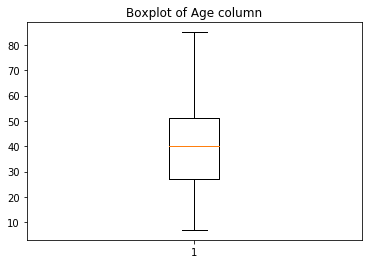

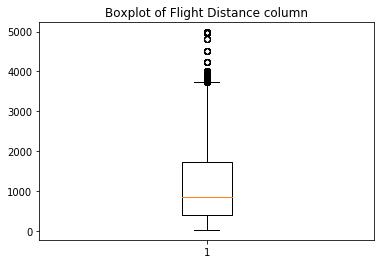

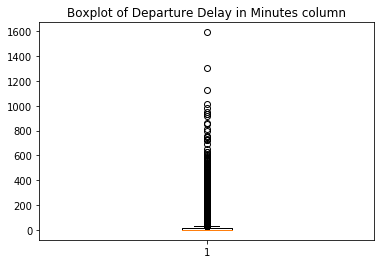

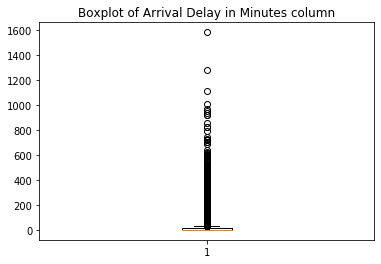

In [21]:
# Plotting box plot of numerical
columns = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes' ]
for col in columns:
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col} column')
    plt.show()

In [22]:
## Outliers in Departure/Arrival Delay in minutes can be ignored since it varies
## across different flights and are valid. 

#### IQR method to find Outliers in Flight Distance

In [23]:
Q1 = np.percentile(df['Flight Distance'], 25, interpolation='midpoint')
Q2 = np.percentile(df['Flight Distance'], 50, interpolation='midpoint')
Q3 = np.percentile(df['Flight Distance'], 75, interpolation='midpoint')

In [24]:
print(Q1)
print(Q2)
print(Q3)

414.0
844.0
1744.0


In [25]:
df['Flight Distance'].max()

4983

In [26]:
# Finding Inter Quartile Range 
IQR = Q3-Q1

In [27]:
print(IQR)

1330.0


In [28]:
# Finding upper and lower limit
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

-1581.0
3739.0


In [29]:
outlier = []
for x in df['Flight Distance']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [30]:
print(len(outlier))

2855


#### The total number of outliers in Flight Distance is around 2855. So here we are not dropping the rows since these many rows cannot be dropped. These rows will be that of long distance flights too

### 2.3 Feature Engineering

#### For the model building, for the passengers to easily fill in the survey for prediction we are converting our Flight distance and Arrival Delay in minutes to two groups 

In [31]:
# function to group Flight distance into classes
def flight_distance(n):
    if n <=1000:
        return 'Short Distance'
    elif n >1000:
         return 'Long Distance'

In [32]:
# Applying lambda function
df['Flight Distance'] = df['Flight Distance'].apply(lambda x:flight_distance(x))

In [33]:
# function to group Flight distance into classes
def flight_delay(n):
    if n <= 0:
        return 'No Delay'
    elif n > 0:
         return 'Delayed'

In [34]:
# Applying lambda function
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].apply(lambda x:flight_delay(x))

### 2.4 Encoding

#### Label Encoding all object type data

In [35]:
columns = ['satisfaction', 'Gender', 'Customer Type', 'Type of Travel','Class','Flight Distance','Arrival Delay in Minutes']
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in columns:
    df[col] = label_encoder.fit_transform(df[col])
    print(label_encoder.classes_)

['neutral or dissatisfied' 'satisfied']
['Female' 'Male']
['First time user' 'Returning']
['Business travel' 'Personal Travel']
['Business' 'Eco']
['Long Distance' 'Short Distance']
['Delayed' 'No Delay']


In [36]:
df.head(5)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,0,56,1,1,1,4,2,4,...,3,3,1,5,3,3,4,3,0,1
1,1,1,0,49,1,1,0,4,2,1,...,3,2,1,1,4,4,3,2,0,1
2,1,1,0,55,1,1,0,4,3,4,...,3,3,3,5,3,2,3,3,0,1
3,1,0,0,36,1,1,0,4,4,4,...,4,4,5,4,5,5,5,4,0,1
4,1,1,0,55,1,1,1,4,5,4,...,3,3,3,4,5,3,4,3,0,1


#### plotting correlation matrix

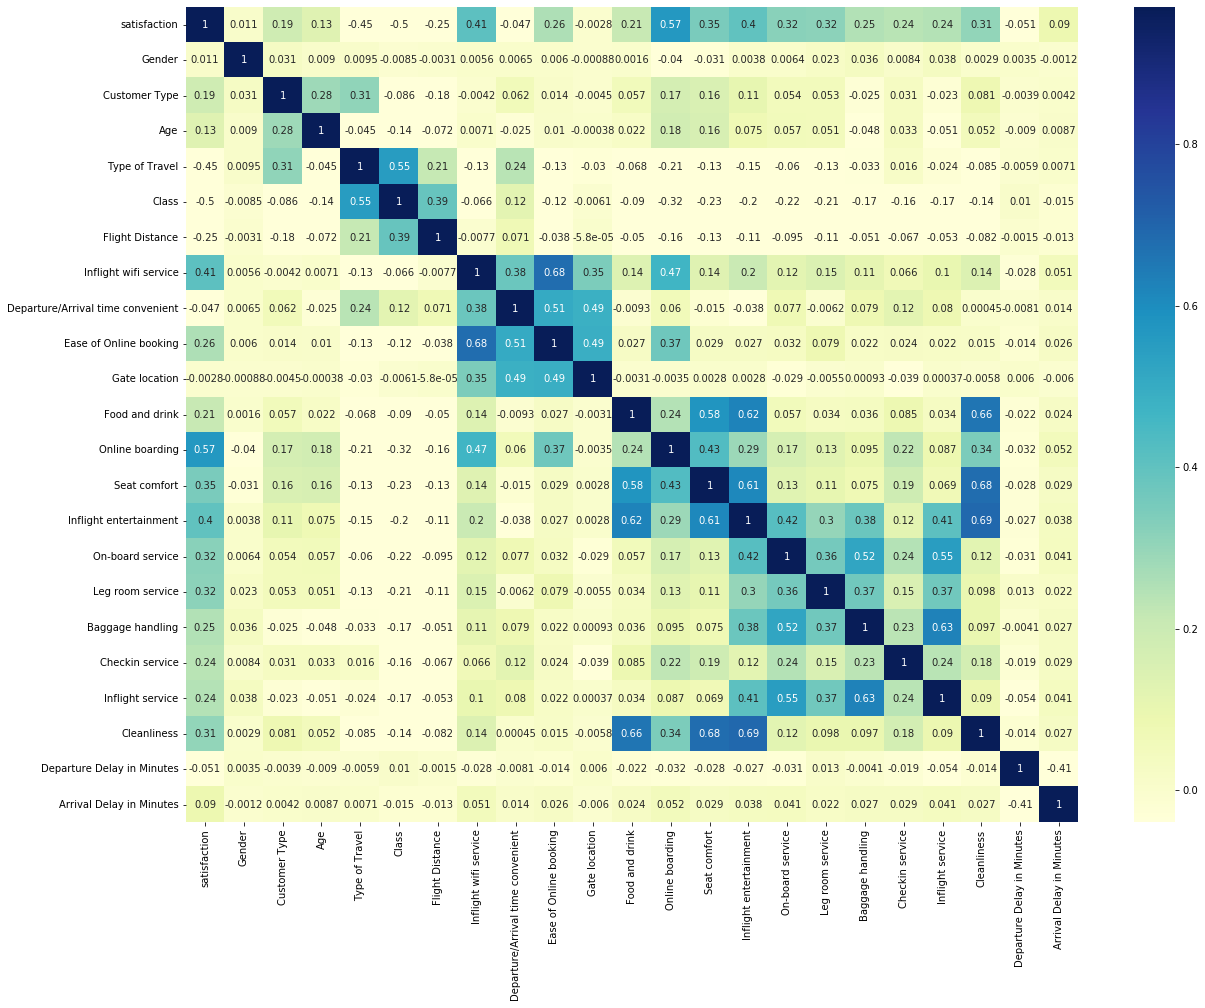

In [37]:
corrmatrix = df.corr()
plt.subplots(figsize=(20, 15))
sns.heatmap(corrmatrix, annot=True,vmin=-.04, vmax=0.97, cmap="YlGnBu")
plt.show()

### 2.5 Scaling Techniques

#### Trying out different models

In [38]:
### Splitting into target and features
X = df.drop(['satisfaction','Gender','Gate location','Departure Delay in Minutes'], axis=1)
y = df['satisfaction']

In [39]:
### Split into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [41]:
# creating model Logistic Regression
logit_model = LogisticRegression()
logit_model = logit_model.fit(X_train, y_train)
y_pred_logit = logit_model.predict(X_test)
#finding accuracy
lr_acc_ws = accuracy_score(y_test, y_pred_logit)

C:\Users\akshathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### kNN Model

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
## finding optimum k value
metric_k = []
neighbors = range(3, 15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X_train, y_train)
    y_pred_kNN = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred_kNN)
    metric_k.append(acc)

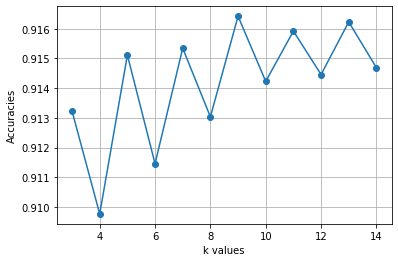

In [44]:
# plotting k values vs accuracy score to check k with highest accuracy
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()
plt.show()

In [45]:
# creating model kNN
classifier = KNeighborsClassifier(n_neighbors=9)
classifier = classifier.fit(X_train, y_train)
y_pred_kNN = classifier.predict(X_test)
# finding accuracy
knn_acc_ws = accuracy_score(y_test, y_pred_kNN)

### Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
# creating model Decision Tree
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
# finding accuracy
dt_acc_ws = accuracy_score(y_test, y_pred_dt)

### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
# model training Random Forest
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(X_train,y_train)
y_pred_rf = rf_clf.predict(X_test)
# finding accuracy
rf_acc_ws = accuracy_score(y_test, y_pred_rf)

### Min Max Scaling

In [48]:
#### Minmax Scaling
from sklearn.preprocessing import MinMaxScaler
### Splitting into target and features
X = df.drop(['satisfaction','Gender','Gate location','Departure Delay in Minutes'], axis=1)
y = df['satisfaction']
num_cols = ['Age']
min_max_scaler = MinMaxScaler(feature_range=(0,1))
X.loc[:,num_cols] = min_max_scaler.fit_transform(X[num_cols])

In [49]:
### Split into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression

In [50]:
# creating model Logistic Regression
logit_model = LogisticRegression()
logit_model = logit_model.fit(X_train, y_train)
y_pred_logit = logit_model.predict(X_test)
#finding accuracy
lr_acc_minmax = accuracy_score(y_test, y_pred_logit)

C:\Users\akshathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### kNN Model

In [51]:
## finding optimum k value
metric_k = []
neighbors = range(3, 15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X_train, y_train)
    y_pred_kNN = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred_kNN)
    metric_k.append(acc)

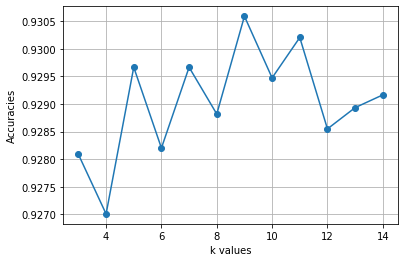

In [52]:
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()
plt.show()

In [53]:
# creating model
classifier = KNeighborsClassifier(n_neighbors=9)
classifier = classifier.fit(X_train, y_train)
y_pred_kNN = classifier.predict(X_test)

In [54]:
knn_acc_minmax = accuracy_score(y_test, y_pred_kNN)

#### Standard Scaling

In [55]:
### Splitting into target and features
X = df.drop(['satisfaction','Gender','Gate location','Departure Delay in Minutes'], axis=1)
y = df['satisfaction']

In [56]:
from sklearn.preprocessing import StandardScaler
std_scl = StandardScaler()
X.loc[:,num_cols] = std_scl.fit_transform(X[num_cols])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression

In [58]:
# creating model Logistic Regression
logit_model = LogisticRegression()
logit_model = logit_model.fit(X_train, y_train)
y_pred_logit = logit_model.predict(X_test)
#finding accuracy
lr_acc_std = accuracy_score(y_test, y_pred_logit)

C:\Users\akshathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### kNN Model

In [59]:
## finding optimum k value
metric_k = []
neighbors = range(3, 15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X_train, y_train)
    y_pred_kNN = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred_kNN)
    metric_k.append(acc)

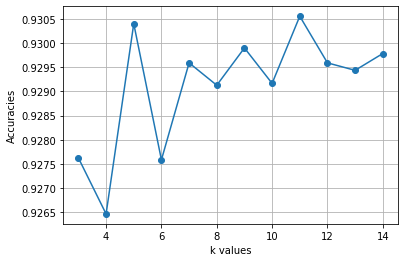

In [60]:
# Plotting Graph of k vs metric
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()
plt.show()

In [61]:
# creating model
classifier = KNeighborsClassifier(n_neighbors=11)
classifier = classifier.fit(X_train, y_train)
y_pred_kNN = classifier.predict(X_test)

In [62]:
knn_acc_std = accuracy_score(y_test, y_pred_kNN)

### Normalization

In [63]:
### Splitting into target and features
X = df.drop(['satisfaction','Gender','Gate location','Departure Delay in Minutes'], axis=1)
y = df['satisfaction']

In [64]:
from sklearn import preprocessing
X.loc[:,num_cols] = preprocessing.normalize(X[num_cols])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression

In [66]:
# creating model Logistic Regression
logit_model = LogisticRegression()
logit_model = logit_model.fit(X_train, y_train)
y_pred_logit = logit_model.predict(X_test)
#finding accuracy
lr_acc_nor = accuracy_score(y_test, y_pred_logit)

C:\Users\akshathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### kNN

In [67]:
## finding optimum k value
metric_k = []
neighbors = range(3, 15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X_train, y_train)
    y_pred_kNN = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred_kNN)
    metric_k.append(acc)

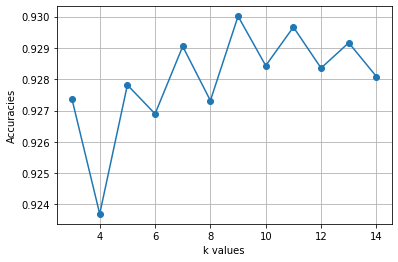

In [68]:
# Plotting Graph of k vs metric
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()
plt.show()

In [69]:
# creating model
classifier = KNeighborsClassifier(n_neighbors=9)
classifier = classifier.fit(X_train, y_train)
y_pred_kNN = classifier.predict(X_test)

In [70]:
knn_acc_nor = accuracy_score(y_test, y_pred_kNN)

### Summary of the minmax scaling, standard scaling, normalization

#### Logistic Regression

In [71]:
summary_lr = pd.DataFrame([[lr_acc_ws],[lr_acc_minmax],[lr_acc_std],[lr_acc_nor]],index=['Without Scaling','MinMax Scaling','Std Scaling','Normalization'],columns=['Accuracy Score'])
summary_lr

,Accuracy Score
Without Scaling,0.891554
MinMax Scaling,0.891669
Std Scaling,0.891592
Normalization,0.890668


#### kNN

In [72]:
summary_knn = pd.DataFrame([[knn_acc_ws],[knn_acc_minmax],[knn_acc_std],[knn_acc_nor]],index=['Without Scaling','MinMax Scaling','Std Scaling','Normalization'],columns=['Accuracy Score'])
summary_knn

,Accuracy Score
Without Scaling,0.916423
MinMax Scaling,0.930590
Std Scaling,0.930551
Normalization,0.930012


In [73]:
summary = pd.DataFrame([[dt_acc_ws],[rf_acc_ws]],index=['Decision Tree','Random Forest'],columns=['Accuracy Score'])
summary

,Accuracy Score
Decision Tree,0.941061
Random Forest,0.955228


In [74]:
#### Random Forest gives maximum accuracy here

In [75]:
#Saving to new file processed data

In [76]:
df.to_excel('Satisfaction_Pro.xlsx',index=False)